In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df=pd.read_csv("netflix_titles.csv")

In [3]:
print (df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [4]:
df.isnull().sum() #FindingNullValues

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

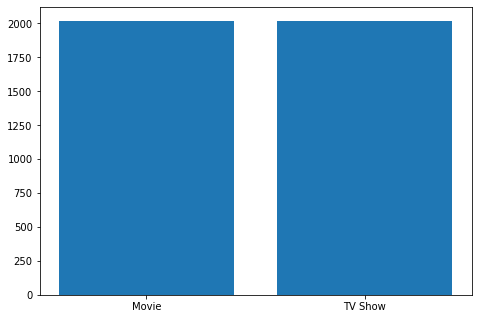

In [5]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.bar(df["type"], df["release_year"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


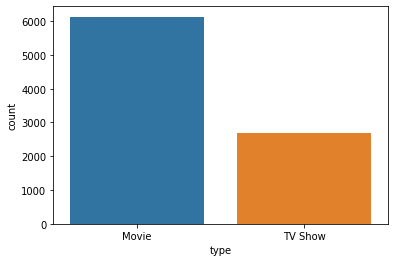

In [6]:
sns.countplot(df.type)


In [7]:
df=df.dropna(axis=0,subset=['country']) #Remove Null value in country column

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Plot Pie chart for country with most netflix show
#plt.pie(df["country"],label=df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


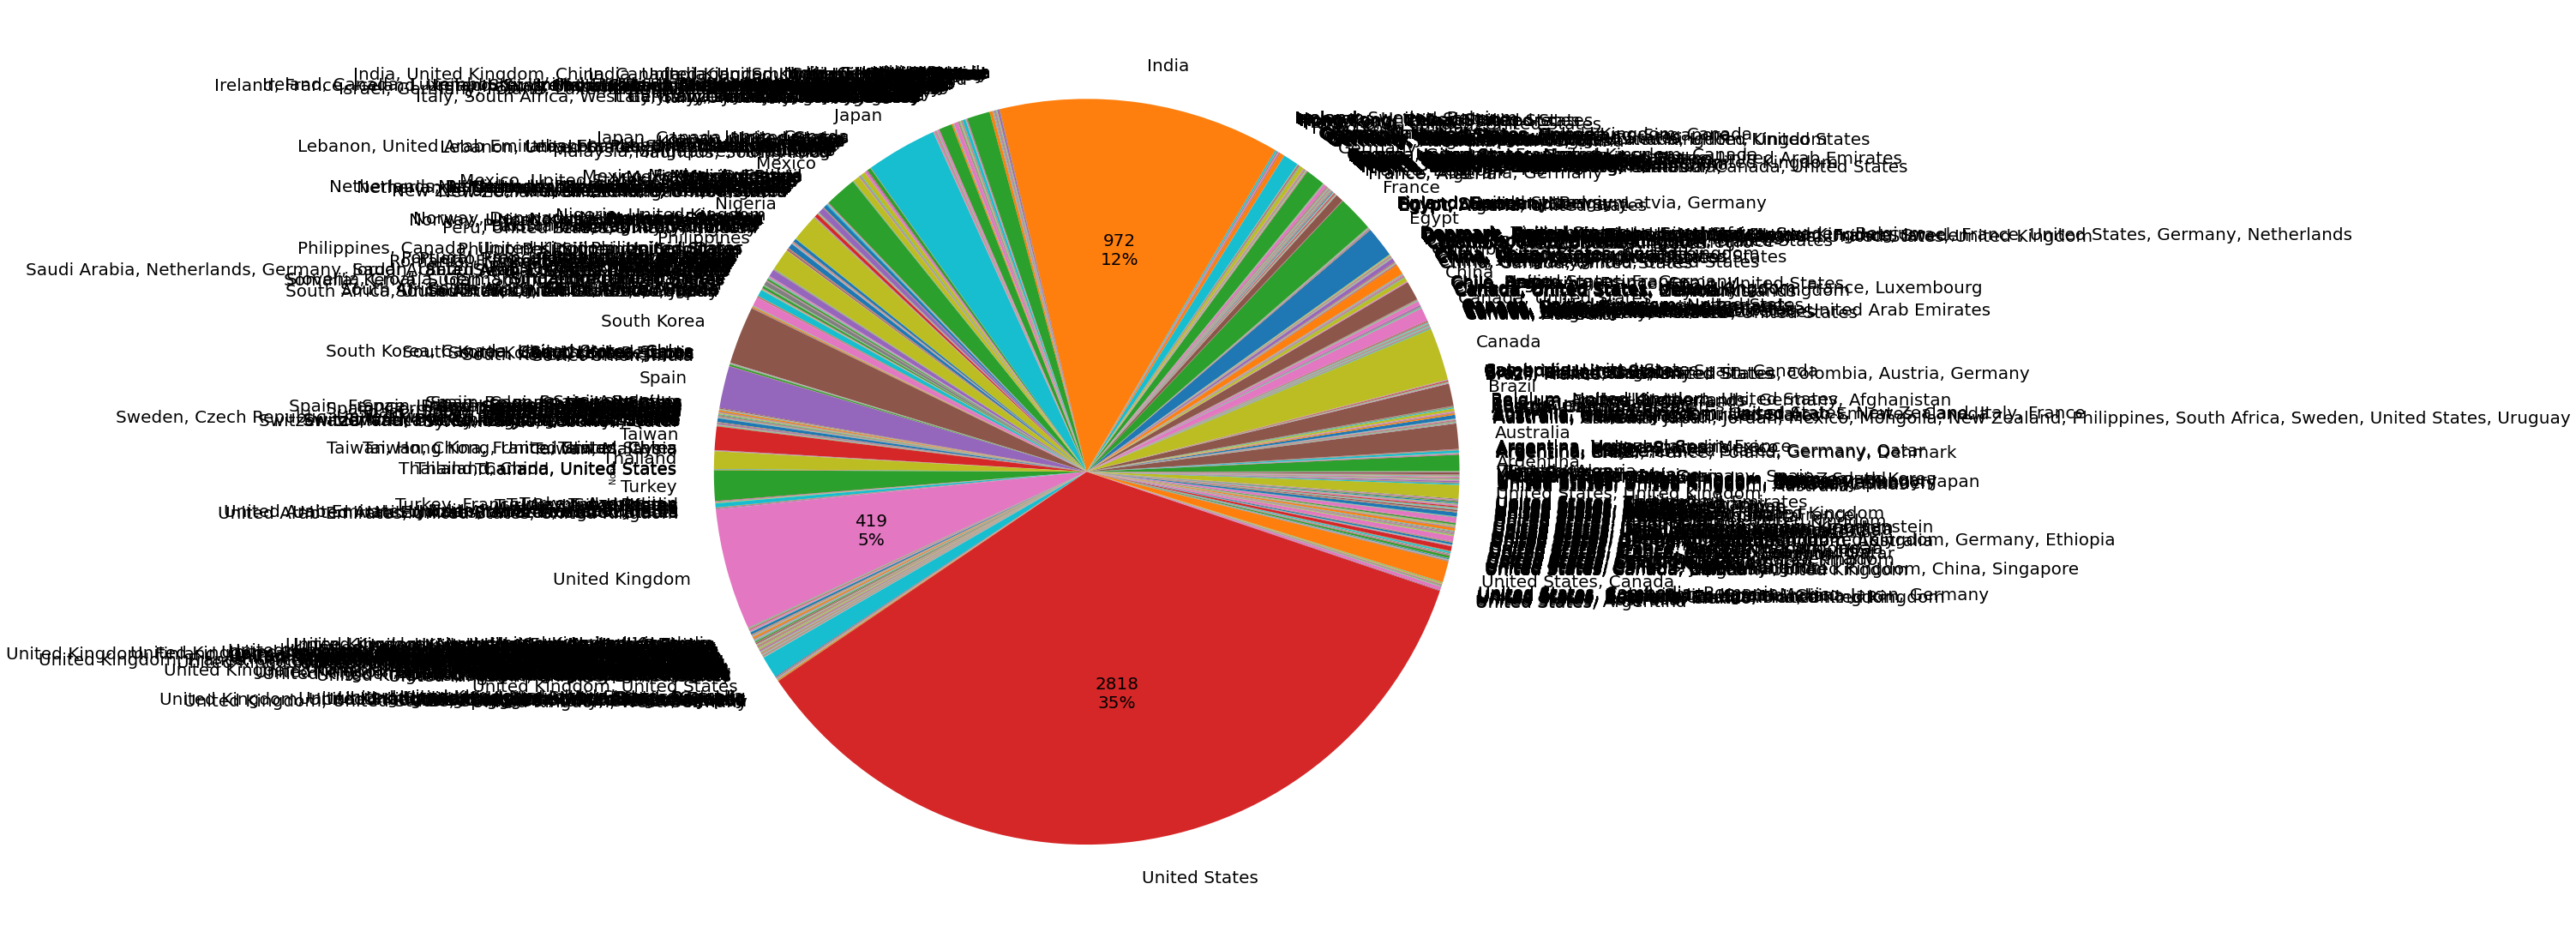

In [10]:
def label_function(val):
  return (f'{val/100*len(df):.0f}\n{val:.0f}%') if val>5 else '' #Calculates percentage and displays it
fig,(ax1)=plt.subplots(ncols=1, figsize = (20,20))
df.groupby('country').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 20},ax=ax1)
#ax1.set_ylabel('Country', size=10)
plt.tight_layout()
plt.show()

In [11]:
df2= df.groupby([df['release_year']]).agg({'count'})
df2

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
,count,count,count,count,count,count,count,count,count,count,count
release_year,,,,,,,,,,,
1942,2,2,2,2,1,2,2,2,2,2,2
1943,3,3,3,3,0,3,3,3,3,3,3
1944,3,3,3,3,1,3,3,3,3,3,3
1945,4,4,4,3,1,4,4,4,4,4,4
1946,2,2,2,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2017,966,966,966,736,863,966,966,966,965,966,966
2018,1038,1038,1038,707,936,1038,1037,1038,1038,1038,1038


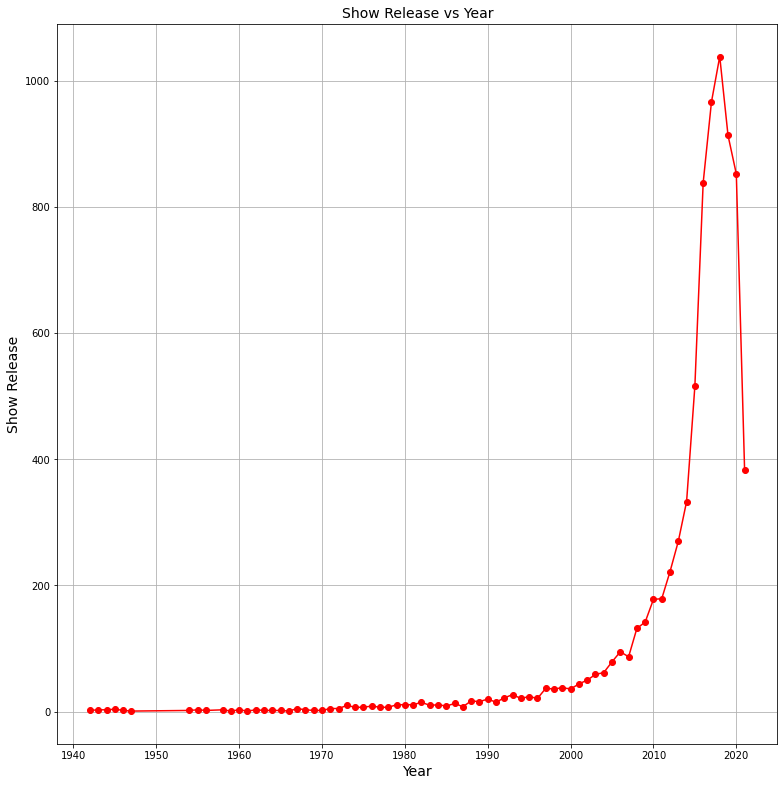

In [12]:
plt1=plt.figure(figsize=(10,10))
axes=plt1.add_axes([0,0,1,1])
axes.plot(df2.index,df2['show_id'], color='red', marker='o') #Index is mentioned coz release_year is not a variable hence df2.index
plt.title('Show Release vs Year', fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Show Release', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
df3= df.groupby([df['rating']]).agg({'count'})
df3

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
,count,count,count,count,count,count,count,count,count,count,count
rating,,,,,,,,,,,
66 min,1,1,1,1,1,1,1,1,0,1,1
74 min,1,1,1,1,1,1,1,1,0,1,1
84 min,1,1,1,1,1,1,1,1,0,1,1
G,41,41,41,41,40,41,41,41,41,41,41
NC-17,3,3,3,2,3,3,3,3,3,3,3
NR,80,80,80,75,63,80,79,80,80,80,80
PG,281,281,281,281,275,281,281,281,281,281,281
PG-13,482,482,482,481,470,482,482,482,482,482,482


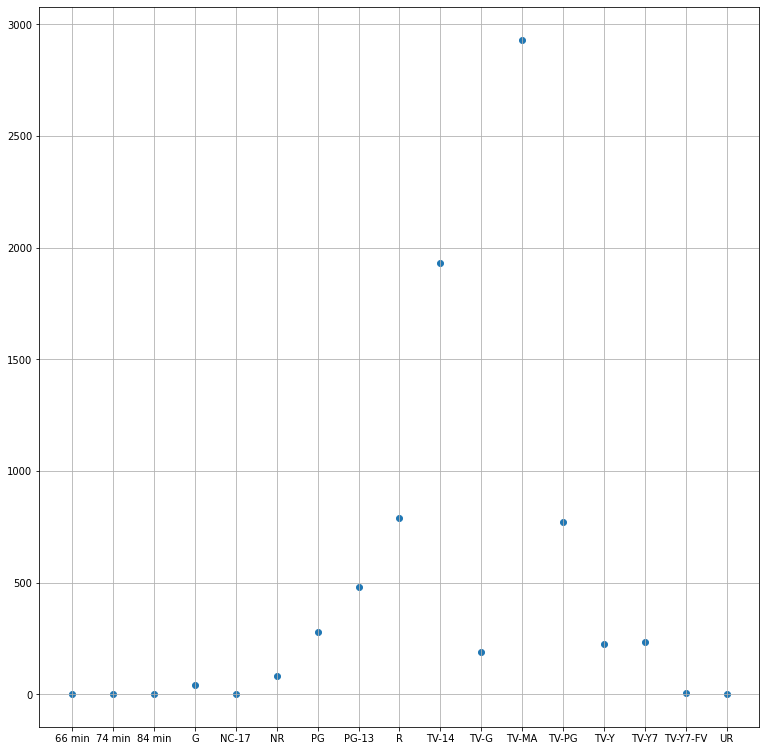

In [14]:
plt2=plt.figure(figsize=(10,10))
axes=plt2.add_axes([0,0,1,1])
plt.scatter(df3.index,df3['show_id'])
plt.grid(True)
